# PROJECT : Face Detection with Haar Cascades #

# NAME : POOJA P #

# REG NO : 212224230195 #

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
w_glass = cv2.imread('image_01.png', cv2.IMREAD_GRAYSCALE)
wo_glass = cv2.imread('image_02.png', cv2.IMREAD_GRAYSCALE)
group = cv2.imread('image_03.png', cv2.IMREAD_GRAYSCALE)

In [3]:
w_glass1 = cv2.resize(w_glass, (1000, 1000))
wo_glass1 = cv2.resize(wo_glass, (1000, 1000)) 
group1 = cv2.resize(group, (1000, 1000))

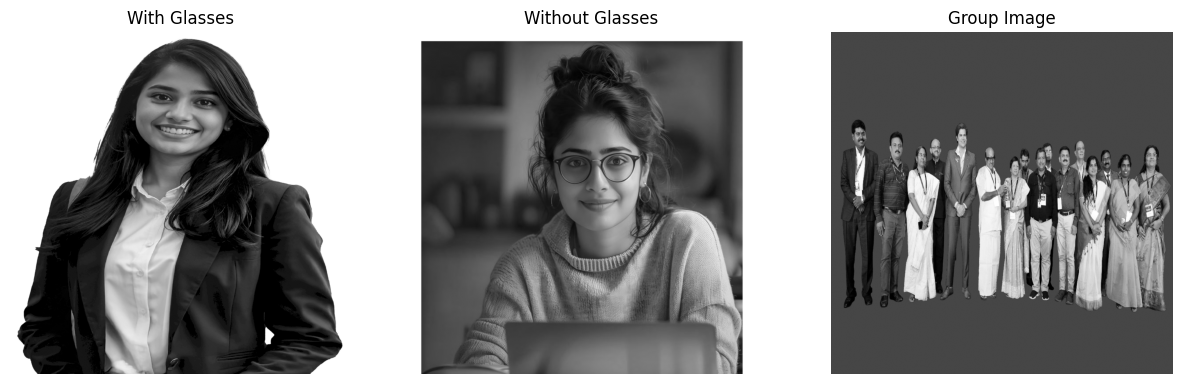

In [4]:
plt.figure(figsize=(15,10))
plt.subplot(1,3,1);plt.imshow(w_glass1,cmap='gray');plt.title('With Glasses');plt.axis('off')
plt.subplot(1,3,2);plt.imshow(wo_glass1,cmap='gray');plt.title('Without Glasses');plt.axis('off')
plt.subplot(1,3,3);plt.imshow(group1,cmap='gray');plt.title('Group Image');plt.axis('off')
plt.show()

In [5]:
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
def detect_and_display(image):
    faces = face_cascade.detectMultiScale(image, scaleFactor=1.1, minNeighbors=5)
    for (x, y, w, h) in faces:
        cv2.rectangle(image, (x, y), (x + w, y + h), (255, 0, 0), 10)
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    plt.show()

Cascade loaded successfully.
Image loaded successfully.


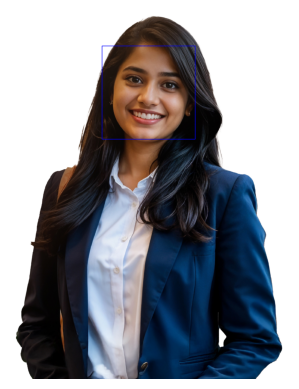

In [6]:
import cv2
from matplotlib import pyplot as plt
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
if face_cascade.empty():
    print("Error: Cascade file not loaded properly!")
else:
    print("Cascade loaded successfully.")
w_glass1 = cv2.imread('image_01.png')  # <-- replace with your image filename

if w_glass1 is None:
    print("Error: Image not found. Check the filename or path.")
else:
    print("Image loaded successfully.")
def detect_and_display(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5)
    for (x, y, w, h) in faces:
        cv2.rectangle(image, (x, y), (x + w, y + h), (255, 0, 0), 3)
    
    return image
if w_glass1 is not None and not face_cascade.empty():
    result = detect_and_display(w_glass1)
    plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

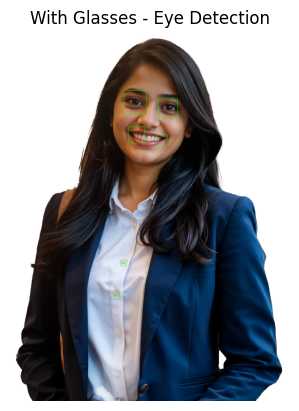

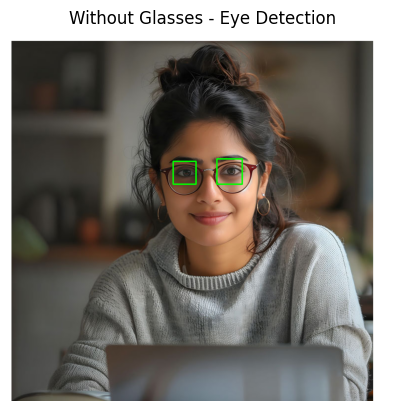

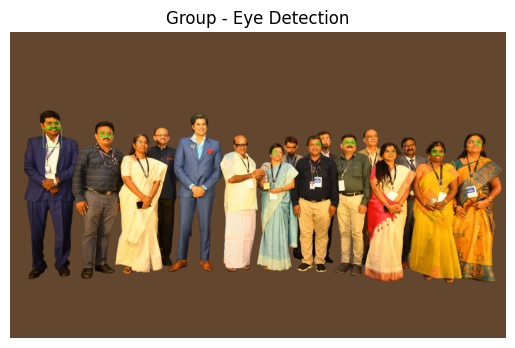

In [7]:
import cv2
from matplotlib import pyplot as plt
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade  = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
if face_cascade.empty():
    print("Error: Face cascade not loaded properly!")
if eye_cascade.empty():
    print("Error: Eye cascade not loaded properly!")
# (Change the filenames as per your actual image files)
w_glass = cv2.imread('image_01.png')
wo_glass = cv2.imread('image_02.png')
group = cv2.imread('image_03.png')
def detect_eyes(image):
    face_img = image.copy()
    gray = cv2.cvtColor(face_img, cv2.COLOR_BGR2GRAY)
    eyes = eye_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5)
    
    for (ex, ey, ew, eh) in eyes:
        cv2.rectangle(face_img, (ex, ey), (ex + ew, ey + eh), (0, 255, 0), 2)
    
    return face_img
if w_glass is not None:
    w_glass_result = detect_eyes(w_glass)
    plt.imshow(cv2.cvtColor(w_glass_result, cv2.COLOR_BGR2RGB))
    plt.title("With Glasses - Eye Detection")
    plt.axis("off")
    plt.show()

if wo_glass is not None:
    wo_glass_result = detect_eyes(wo_glass)
    plt.imshow(cv2.cvtColor(wo_glass_result, cv2.COLOR_BGR2RGB))
    plt.title("Without Glasses - Eye Detection")
    plt.axis("off")
    plt.show()

if group is not None:
    group_result = detect_eyes(group)
    plt.imshow(cv2.cvtColor(group_result, cv2.COLOR_BGR2RGB))
    plt.title("Group - Eye Detection")
    plt.axis("off")
    plt.show()

In [9]:
from IPython.display import clear_output, display
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

In [10]:
def new_detect(gray, frame):
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 0, 0), 2)
        roi_gray = gray[y:y + h, x:x + w]
        roi_color = frame[y:y + h, x:x + w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        for (ex, ey, ew, eh) in eyes:
            cv2.rectangle(roi_color, (ex, ey), (ex + ew, ey + eh), (0, 255, 0), 2)
    return frame

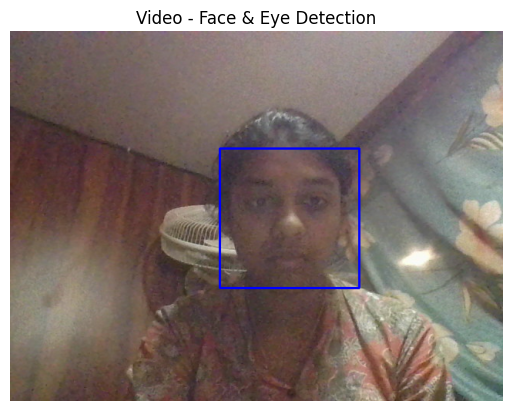

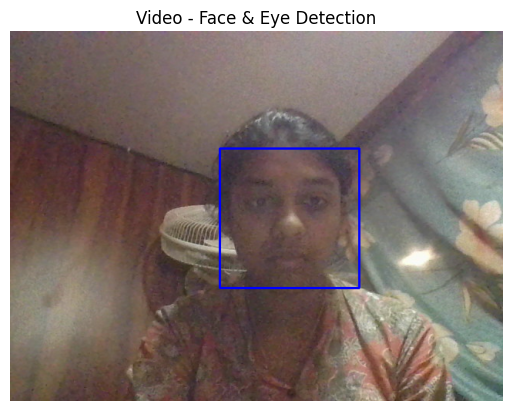

In [11]:
video_capture = cv2.VideoCapture(0)
captured_frame = None   

while True:
    ret, frame = video_capture.read()
    if not ret:
        print("No frame captured from camera.")
        break

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    canvas = new_detect(gray, frame)
    clear_output(wait=True)
    plt.imshow(cv2.cvtColor(canvas, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.title("Video - Face & Eye Detection")
    display(plt.gcf())
    captured_frame = canvas.copy()  
    break

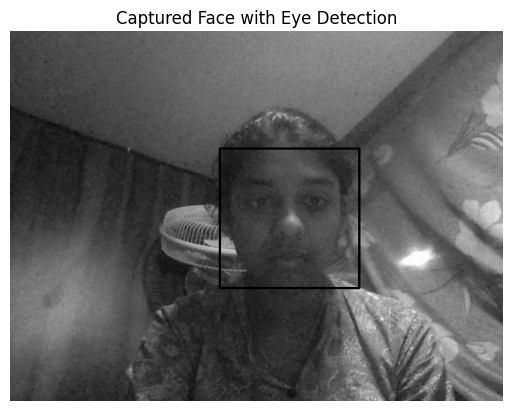

In [12]:
video_capture.release()
if captured_frame is not None and captured_frame.size > 0:
    cv2.imwrite('captured_face_eye.png', captured_frame)
    captured_image = cv2.imread('captured_face_eye.png', cv2.IMREAD_GRAYSCALE)
    plt.imshow(captured_image, cmap='gray')
    plt.title('Captured Face with Eye Detection')
    plt.axis('off')
    plt.show()
else:
    print("No valid frame to save.")